In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
import sqlite3
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [2]:
database = "../F1_timingdata_2014_2019.sqlite"

conn = sqlite3.connect(database)

race_data = pd.read_sql("select * from laps", con=conn)
print(race_data)
conn.close()

        race_id  lapno  position  driver_id  laptime  racetime     gap  \
0             1      0         1          1      NaN     0.000     NaN   
1             1      0         2          2      NaN     0.000     NaN   
2             1      0         3          3      NaN     0.000     NaN   
3             1      0         4          4      NaN     0.000     NaN   
4             1      0         5          5      NaN     0.000     NaN   
...         ...    ...       ...        ...      ...       ...     ...   
134001      121     55         2         27  101.119  5662.487  16.772   
134002      121     55         3         40  102.829  5689.150  43.435   
134003      121     55         4         15  102.180  5690.094  44.379   
134004      121     55         5         12  100.128  5710.072  64.357   
134005      121     55         6         43  103.358  5714.920  69.205   

        interval compound  tireage pitintime  pitstopduration nextcompound  \
0            NaN       A3        

In [3]:
race_data.head()

,race_id,lapno,position,driver_id,laptime,racetime,gap,interval,compound,tireage,pitintime,pitstopduration,nextcompound,startlapprog_vsc,endlapprog_vsc,age_vsc,startlapprog_sc,endlapprog_sc,age_sc
0,1,0,1,1,NaN,0.0,NaN,NaN,A3,2,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,2,2,NaN,0.0,NaN,NaN,A3,2,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,3,3,NaN,0.0,NaN,NaN,A3,2,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,4,4,NaN,0.0,NaN,NaN,A3,2,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,5,5,NaN,0.0,NaN,NaN,A3,2,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
race_data = race_data[race_data.lapno != 0]
index = np.arange(0, len(race_data))

race_data = race_data.reset_index()

print(race_data)

         index  race_id  lapno  position  driver_id  laptime  racetime  \
0           22        1      1         1          3  102.038   102.038   
1           23        1      1         2          2  103.549   103.549   
2           24        1      1         3          4  105.402   105.402   
3           25        1      1         4          1  106.128   106.128   
4           26        1      1         5          7  106.986   106.986   
...        ...      ...    ...       ...        ...      ...       ...   
131522  134001      121     55         2         27  101.119  5662.487   
131523  134002      121     55         3         40  102.829  5689.150   
131524  134003      121     55         4         15  102.180  5690.094   
131525  134004      121     55         5         12  100.128  5710.072   
131526  134005      121     55         6         43  103.358  5714.920   

           gap  interval compound  tireage pitintime  pitstopduration  \
0        0.000     0.000       A3     

In [5]:
no_pit = race_data.loc[race_data['pitstopduration'].isnull() == True]
pit = race_data.loc[race_data['pitstopduration'].isnull() == False]
print(no_pit)

         index  race_id  lapno  position  driver_id  laptime  racetime  \
0           22        1      1         1          3  102.038   102.038   
1           23        1      1         2          2  103.549   103.549   
2           24        1      1         3          4  105.402   105.402   
3           25        1      1         4          1  106.128   106.128   
4           26        1      1         5          7  106.986   106.986   
...        ...      ...    ...       ...        ...      ...       ...   
131522  134001      121     55         2         27  101.119  5662.487   
131523  134002      121     55         3         40  102.829  5689.150   
131524  134003      121     55         4         15  102.180  5690.094   
131525  134004      121     55         5         12  100.128  5710.072   
131526  134005      121     55         6         43  103.358  5714.920   

           gap  interval compound  tireage pitintime  pitstopduration  \
0        0.000     0.000       A3     

In [6]:
print(pit)

         index  race_id  lapno  position  driver_id  laptime  racetime  \
16          38        1      1        17         22  130.795   130.795   
17          39        1      1        18         16  156.707   156.707   
18          40        1      1        19         20  161.894   161.894   
182        204        1     10        16         15  156.286  1038.096   
193        215        1     11         9         10  117.843  1101.790   
...        ...      ...    ...       ...        ...      ...       ...   
131194  133673      121     38         3         40  104.980  3944.580   
131197  133676      121     38         6         12  105.352  3966.548   
131238  133717      121     40         7          8  105.782  4208.112   
131261  133740      121     41        10         25  105.220  4326.769   
131282  133761      121     42        11          2  105.502  4434.759   

            gap  interval compound  tireage            pitintime  \
16       28.757     5.275       A3        1

In [7]:
new_pit = race_data.pitintime.notnull().astype('int')

new_pit.value_counts()


0    127097
1      4430
Name: pitintime, dtype: int64

In [8]:
race_data = race_data.assign(pit = new_pit)

In [9]:
race_data.head

<bound method NDFrame.head of          index  race_id  lapno  position  driver_id  laptime  racetime  \
0           22        1      1         1          3  102.038   102.038   
1           23        1      1         2          2  103.549   103.549   
2           24        1      1         3          4  105.402   105.402   
3           25        1      1         4          1  106.128   106.128   
4           26        1      1         5          7  106.986   106.986   
...        ...      ...    ...       ...        ...      ...       ...   
131522  134001      121     55         2         27  101.119  5662.487   
131523  134002      121     55         3         40  102.829  5689.150   
131524  134003      121     55         4         15  102.180  5690.094   
131525  134004      121     55         5         12  100.128  5710.072   
131526  134005      121     55         6         43  103.358  5714.920   

           gap  interval compound  ...  pitintime pitstopduration  \
0        0.0

In [10]:
x = race_data.drop(['pit','pitstopduration','nextcompound','startlapprog_vsc','age_vsc','endlapprog_vsc','startlapprog_sc','endlapprog_sc','age_sc','pitintime'],axis=1)
y = race_data['pit']


In [11]:
x.head()

,index,race_id,lapno,position,driver_id,laptime,racetime,gap,interval,compound,tireage
0,22,1,1,1,3,102.038,102.038,0.000,0.000,A3,3
1,23,1,1,2,2,103.549,103.549,1.511,1.511,A3,3
2,24,1,1,3,4,105.402,105.402,3.364,1.853,A3,3
3,25,1,1,4,1,106.128,106.128,4.090,0.726,A3,3
4,26,1,1,5,7,106.986,106.986,4.948,0.858,A3,3


In [12]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
131522    0
131523    0
131524    0
131525    0
131526    0
Name: pit, Length: 131527, dtype: int32


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OneHotEncoder()

encoder_df = pd.DataFrame(encoder.fit_transform(x[['compound']]).toarray())
x = pd.concat([x,encoder_df], axis = 1)

x = x.drop(['compound'], axis = 1)

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

print(x)



[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.46363345e-06 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.49272669e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99985073e-01 1.00000000e+00 7.01298701e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99992536e-01 1.00000000e+00 7.01298701e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 7.01298701e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


C:\Users\makss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\makss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\makss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


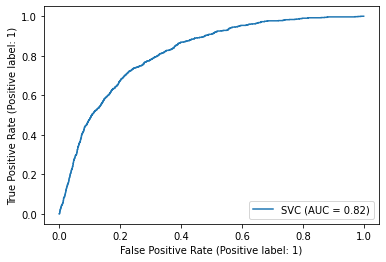

In [15]:

model = svm.SVC(gamma='scale',cache_size=1000, class_weight='balanced',C = 0.7)
model_displays = {}
model.fit(X_train, y_train)
fig,ax =plt.subplots()
name = type(model).__name__
model_displays[type(model).__name__] = plot_roc_curve(
        model,X_test,y_test,ax=ax,name=name)
#print('Mean ROC AUC: %.3f' % np.mean(scores))

In [16]:
clf = svm.SVC(gamma='scale',cache_size=1000, class_weight='balanced',C = 0.7)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)


[0 0 1 ... 1 0 1]


<AxesSubplot:xlabel='lapno', ylabel='pit'>

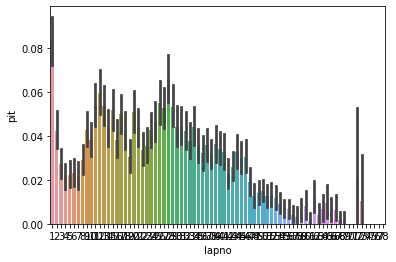

In [17]:
test_df = pd.DataFrame(y_pred)
test_df.value_counts()
#sns.barplot(data=test_df.value_counts())
sns.barplot(x='lapno',y='pit', data = race_data)

In [18]:
cr = classification_report(y_true=y_test, y_pred=y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82     25397
           1       0.09      0.78      0.15       909

    accuracy                           0.71     26306
   macro avg       0.54      0.74      0.49     26306
weighted avg       0.96      0.71      0.80     26306

